In [53]:
!pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

## Load Data

In [5]:
df = pd.read_excel("Cafesales.xlsx", engine="openpyxl")

In [6]:
df.shape

(146614, 7)

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [11]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [13]:
most_freq = df[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,PRD026,Chai Latte,78
1,PRD021,Macchiato,75
2,PRD068,Cappuccino,73
3,PRD062,Cappuccino,73
4,PRD069,Strawberry Gelato,72
...,...,...,...
2866,PRD083,Cappuccino,31
2867,PRD053,Iced Coffee,31
2868,PRD035,Macchiato,30
2869,PRD064,Vanilla Gelato,29


## Create TotalPrice

In [15]:
df2 = df.copy()
df2['TotalPrice'] = df2['Quantity'] * df2['UnitPrice']
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,440034,PRD017,Mint Chocolate Chip Ice Cream,2,2024-01-01 08:00:00,6.41,12565,12.82
1,427741,PRD071,Cold Brew,2,2024-01-01 12:00:00,8.45,17524,16.90
2,444671,PRD012,Chocolate Ice Cream,2,2024-01-01 11:00:00,3.71,17706,7.42


## Monthly Sales

In [17]:
df2['Year'] = df2['InvoiceDate'].dt.year
df2['Month'] = df2['InvoiceDate'].dt.month
df2.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Year,Month
67627,412565,PRD037,Turkey Sandwich,3,2024-07-28 13:00:00,8.62,18629,25.86,2024,7
143793,492272,PRD065,Veggie Sandwich,3,2025-02-22 13:00:00,9.34,14099,28.02,2025,2
127672,426374,PRD046,Mango Gelato,2,2025-01-13 12:00:00,7.65,16167,15.30,2025,1
60888,476525,PRD091,Chocolate Ice Cream,1,2024-07-07 13:00:00,5.21,19692,5.21,2024,7
26178,462390,PRD051,Salted Caramel Ice Cream,2,2024-03-22 18:00:00,7.38,13653,14.76,2024,3


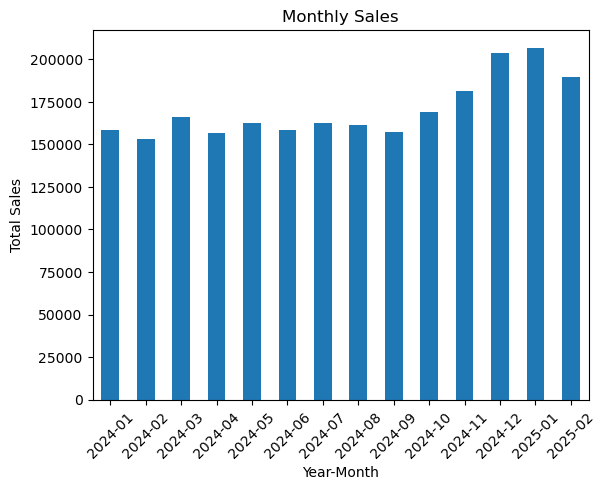

In [19]:
df2['YearMonth'] = df2['InvoiceDate'].dt.to_period('M')  # Create Year-Month column
Monthly_Sales = df2.groupby('YearMonth')['TotalPrice'].sum()  # Group by Year-Month

# Plot the results
Monthly_Sales.plot(kind='bar', title='Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

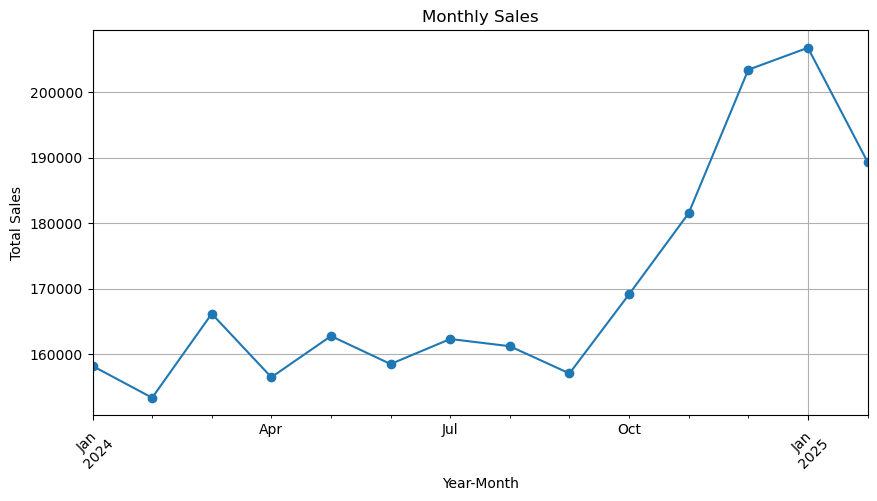

In [21]:
# Create a Year-Month column
df2['YearMonth'] = df2['InvoiceDate'].dt.to_period('M')  # Converts to 'YYYY-MM' format

# Group by Year-Month and sum total sales
Monthly_Sales = df2.groupby('YearMonth')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(10,5))
Monthly_Sales.plot(kind='line', title='Monthly Sales', marker="o")
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.show()

## Top 5 Products 

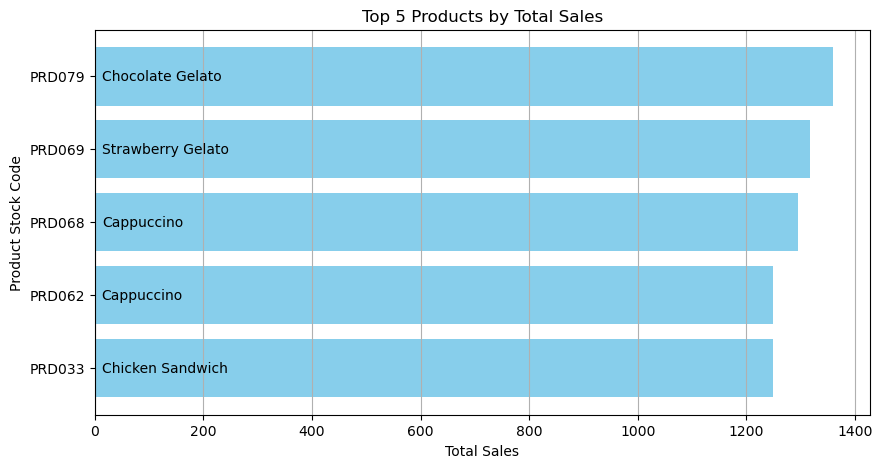

In [23]:
# Group by StockCode and sum total sales
product_wise_sales = df2.groupby(['StockCode', 'Description'])['TotalPrice'].sum()

# Get the top 5 products by sales
top5_products = product_wise_sales.sort_values(ascending=False).head(5)

# Extract StockCode and Description separately
stock_codes = [stock for stock, desc in top5_products.index]
descriptions = [desc for stock, desc in top5_products.index]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(stock_codes, top5_products.values, color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Total Sales')
plt.grid(axis='x')

# Add product names **below** StockCode
for bar, desc in zip(bars, descriptions):
    plt.text(bar.get_x() + bar.get_width() * 0.01, bar.get_y() + bar.get_height() / 2, 
             desc, va='center', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Keep highest sales at the top
plt.show()

## Churned Customer(Member) & RMF Score

In [25]:
current_date = df2['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2025-03-01 19:00:00')

In [27]:
rfm = df2.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (current_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalPrice' : 'sum'
})

rfm.columns = ['Recency','Frequency','Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
10000,64,10,149.58
10001,70,9,120.37
10002,32,16,256.51
10003,20,18,326.44
10004,12,19,353.66


In [28]:
df2[df2.CustomerID==10002]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Year,Month,YearMonth
1911,464756,PRD065,Americano,2,2024-01-06 10:00:00,8.83,10002,17.66,2024,1,2024-01
6573,447194,PRD011,Americano,1,2024-01-21 19:00:00,4.38,10002,4.38,2024,1,2024-01
7518,488300,PRD092,Veggie Sandwich,1,2024-01-25 18:00:00,7.09,10002,7.09,2024,1,2024-01
31766,412275,PRD080,Egg Salad Sandwich,1,2024-04-08 12:00:00,4.76,10002,4.76,2024,4,2024-04
33315,481607,PRD094,Chicken Sandwich,2,2024-04-13 17:00:00,8.93,10002,17.86,2024,4,2024-04
41287,435283,PRD037,Pistachio Gelato,3,2024-05-08 13:00:00,4.97,10002,14.91,2024,5,2024-05
57700,436522,PRD056,Espresso,2,2024-06-28 10:00:00,7.65,10002,15.30,2024,6,2024-06
87905,484590,PRD053,Americano,4,2024-09-29 13:00:00,9.00,10002,36.00,2024,9,2024-09
92854,454568,PRD077,Veggie Sandwich,4,2024-10-15 13:00:00,9.38,10002,37.52,2024,10,2024-10
97706,465125,PRD048,Cappuccino,3,2024-10-29 19:00:00,5.99,10002,17.97,2024,10,2024-10


In [31]:
#Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm ['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
10000,64,10,149.58,1,1,1,3
10001,70,9,120.37,1,1,1,3
10002,32,16,256.51,2,3,3,8
10003,20,18,326.44,2,4,4,10
10004,12,19,353.66,3,4,4,11
...,...,...,...,...,...,...,...
19995,4,17,288.85,4,3,4,11
19996,4,20,304.30,4,4,4,12
19997,75,9,151.66,1,1,1,3


In [33]:
#Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18122,2,20,382.43,4,4,4,12
18046,2,20,341.48,4,4,4,12
18053,7,19,319.52,4,4,4,12
18930,3,20,351.51,4,4,4,12
19798,3,18,331.99,4,4,4,12
...,...,...,...,...,...,...,...
11907,43,6,126.04,1,1,1,3
15911,72,11,186.01,1,1,1,3
15915,65,10,155.22,1,1,1,3


In [35]:
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Year,Month,YearMonth
0,440034,PRD017,Mint Chocolate Chip Ice Cream,2,2024-01-01 08:00:00,6.41,12565,12.82,2024,1,2024-01
1,427741,PRD071,Cold Brew,2,2024-01-01 12:00:00,8.45,17524,16.90,2024,1,2024-01
2,444671,PRD012,Chocolate Ice Cream,2,2024-01-01 11:00:00,3.71,17706,7.42,2024,1,2024-01


In [37]:
# Create a basket matrix for association rule mining.
customer_last_purchase = df2.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
10000   2024-12-27 08:00:00
10001   2024-12-21 15:00:00
10002   2025-01-28 13:00:00
10003   2025-02-09 15:00:00
10004   2025-02-17 10:00:00
Name: InvoiceDate, dtype: datetime64[ns]

In [39]:
type(customer_last_purchase)

pandas.core.series.Series

In [41]:
current_date

Timestamp('2025-03-01 19:00:00')

In [43]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

CustomerID
10000    64
10001    70
10002    32
10003    20
10004    12
Name: InvoiceDate, dtype: int64

In [45]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

CustomerID
10011    154
10190    109
10255    222
10282    104
10370    107
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 244


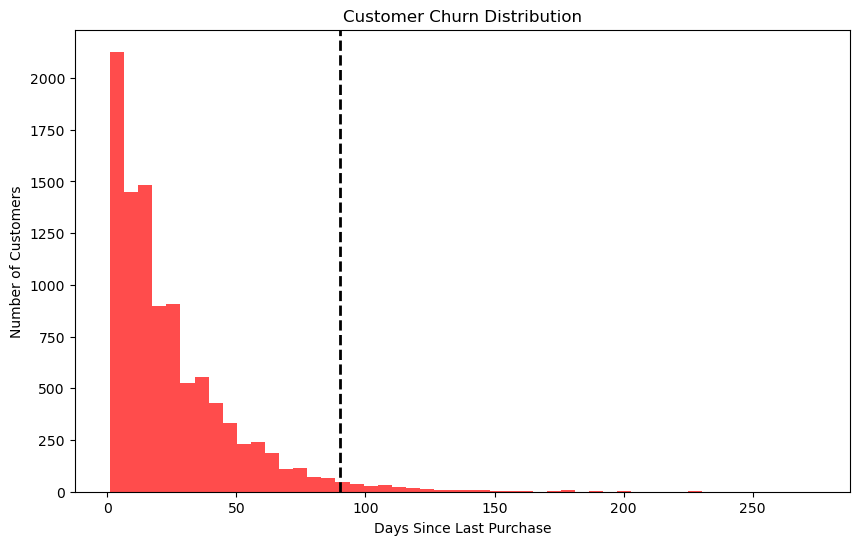

In [47]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(x=churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()


In [49]:
# Convert InvoiceDate to datetime if not already
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

# Extract day of the week and hour
df2['DayOfWeek'] = df2['InvoiceDate'].dt.day_name()  # Monday, Tuesday, etc.
df2['Hour'] = df2['InvoiceDate'].dt.hour  # 0 to 23 (24-hour format)

# Define order of days (since groupby sorts alphabetically by default)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

## Sales HeatMap

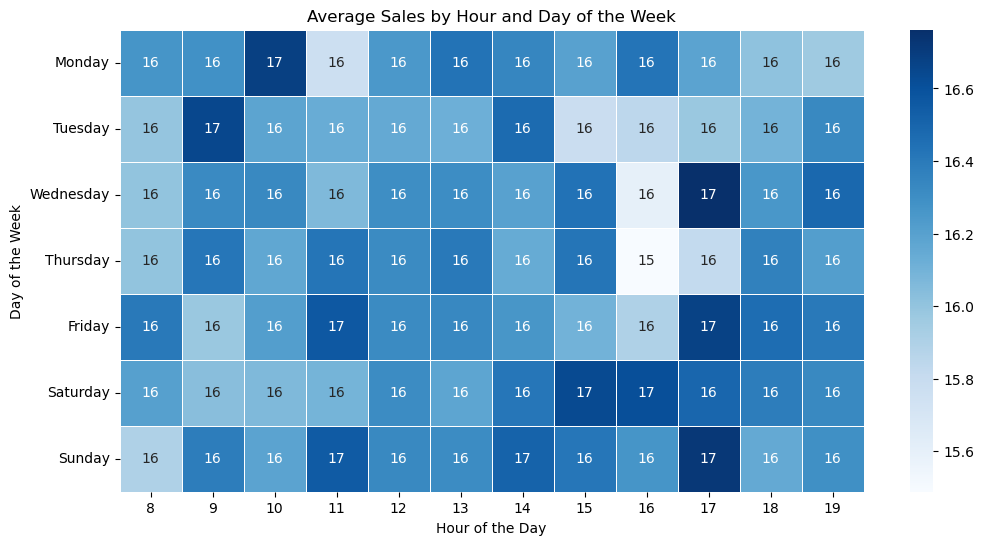

In [51]:
import seaborn as sns

# Compute average sales per hour for each day
avg_sales_per_hour = df2.groupby(['DayOfWeek', 'Hour'])['TotalPrice'].mean().unstack()

# Reorder the days
avg_sales_per_hour = avg_sales_per_hour.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(avg_sales_per_hour, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")
plt.title('Average Sales by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In [71]:
# Export DataFrame to Excel for Power BI
df2.to_excel("Cafe_Sales_PowerBI.xlsx", index=False, engine="openpyxl")

print("Dataset successfully exported as 'Cafe_Sales_PowerBI.xlsx'")

Dataset successfully exported as 'Cafe_Sales_PowerBI.xlsx'
